<a href="https://colab.research.google.com/github/cathrine36/ML_algorithms/blob/master/Boston_House_Dataset_Multi_Output_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

In [ ]:
boston = load_boston()


In [ ]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

In [ ]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names

In [ ]:
#Adding target variable to dataframe
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


There are 506 rows and 14 columns/features in this dataset. Price feature is described by 13 other features, in addition with choose Ptratio to be output target.

In [ ]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
def format_output(data):
    y1 = data.pop('PTRATIO')
    y1 = np.array(y1)
    y2 = data.pop('PRICE')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.32543,0.0,21.89,0.0,0.624,6.431,98.8,1.8125,4.0,437.0,21.2,396.90,15.39,18.0
1,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56,18.5
2,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00,21.9
3,0.05083,0.0,5.19,0.0,0.515,6.316,38.1,6.4584,5.0,224.0,20.2,389.71,5.68,22.2
4,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71,13.2
502,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73,21.0
503,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59,24.8
504,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39,8.3


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(data, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('PTRATIO')
train_stats.pop('PRICE')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [ ]:
len(train .columns)

12

In [ ]:
input_layer = Input(shape=(len(train.columns),))

In [ ]:
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

In [ ]:
y1_output = Dense(units='1', name='y1_output')(second_dense)

In [ ]:
third_dense = Dense(units='64', activation='relu')(second_dense)
y2_output = Dense(units='1', name='y2_output')(third_dense)


In [ ]:
model=Model(inputs=input_layer,outputs=[y1_output,y2_output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 12)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1664        input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

In [ ]:

optimizer = tf.keras.optimizers.SGD(lr=0.001)

In [ ]:
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

In [ ]:
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
41/41 [==============================] - 1s 14ms/step - loss: 516.2804 - y1_output_loss: 199.0025 - y2_output_loss: 317.2779 - y1_output_root_mean_squared_error: 13.8354 - y2_output_root_mean_squared_error: 17.2867 - val_loss: 47.3286 - val_y1_output_loss: 16.3333 - val_y2_output_loss: 30.9952 - val_y1_output_root_mean_squared_error: 4.0415 - val_y2_output_root_mean_squared_error: 5.5673
Epoch 2/500
41/41 [==============================] - 0s 2ms/step - loss: 45.0349 - y1_output_loss: 12.9881 - y2_output_loss: 32.0468 - y1_output_root_mean_squared_error: 3.5859 - y2_output_root_mean_squared_error: 5.6503 - val_loss: 33.0587 - val_y1_output_loss: 8.7958 - val_y2_output_loss: 24.2629 - val_y1_output_root_mean_squared_error: 2.9658 - val_y2_output_root_mean_squared_error: 4.9257
Epoch 3/500
41/41 [==============================] - 0s 2ms/step - loss: 24.8822 - y1_output_loss: 5.8286 - y2_output_loss: 19.0537 - y1_output_root_mean_squared_error: 2.4129 - y2_output_root_mean_squ

In [ ]:
norm_test_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT
242,-0.313548,-0.481959,-0.431660,-0.267284,-0.122958,-0.794304,0.050352,-0.011469,-0.632212,-0.597900,0.377260,-0.171797
135,0.957669,-0.481959,1.005459,-0.267284,0.548110,-0.907735,0.692370,-0.902407,1.685516,1.533315,-0.719153,0.222952
194,2.343765,-0.481959,1.005459,-0.267284,1.307476,-2.337825,1.132204,-1.136089,1.685516,1.533315,0.442891,2.207896
164,-0.382733,-0.481959,0.115196,-0.267284,0.186087,0.737731,0.752669,-0.691079,-0.979871,-0.799742,0.404836,-0.843710
319,-0.302381,0.343614,-1.033346,-0.267284,0.839495,1.503030,0.937116,-0.840800,-0.516326,-0.853171,0.404505,-0.175996
...,...,...,...,...,...,...,...,...,...,...,...,...
9,-0.383441,0.550007,-0.865970,-0.267284,-0.873494,-0.507137,-0.740641,1.502396,-0.168666,-0.734440,0.442891,-0.460159
121,-0.378153,-0.481959,2.094842,-0.267284,0.256725,-0.609081,1.025793,-0.905690,-0.863985,-1.304347,0.149595,1.806148
146,-0.387278,1.375580,-1.109819,-0.267284,-1.014771,0.658760,-1.322358,1.284067,-0.516326,-0.057675,0.363583,-1.094277
51,-0.333278,0.343614,-1.033346,-0.267284,0.839495,1.329294,0.834252,-0.912594,-0.516326,-0.853171,0.343508,-0.616939


In [ ]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

4/4 [==============================] - 0s 3ms/step - loss: 13.6982 - y1_output_loss: 1.6923 - y2_output_loss: 12.0059 - y1_output_root_mean_squared_error: 1.3009 - y2_output_root_mean_squared_error: 3.4650
Loss = 13.69823169708252, Y1_loss = 1.6923410892486572, Y1_mse = 1.3009001016616821, Y2_loss = 12.005890846252441, Y2_mse = 3.464951753616333


In [ ]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

4/4 [==============================] - 0s 2ms/step - loss: 13.6982 - y1_output_loss: 1.6923 - y2_output_loss: 12.0059 - y1_output_root_mean_squared_error: 1.3009 - y2_output_root_mean_squared_error: 3.4650
Loss = 13.69823169708252, Y1_loss = 1.6923410892486572, Y1_mse = 1.3009001016616821, Y2_loss = 12.005890846252441, Y2_mse = 3.464951753616333


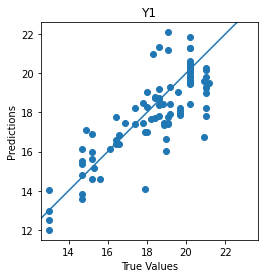

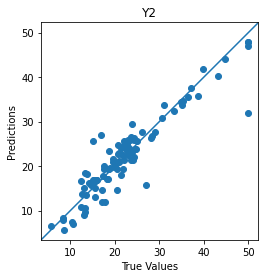

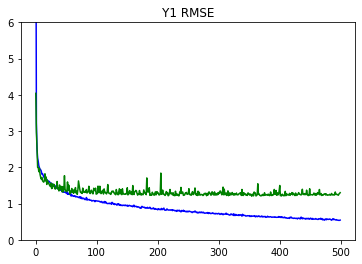

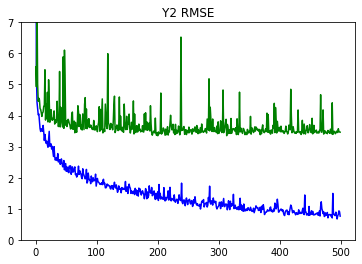

In [ ]:
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)